In [ ]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import imghdr
import numpy as np

In [2]:
data_dir = '../data'
#os.listdir(os.path.join('data', 'happy'))

In [3]:
image_exts = ['jpeg', 'png', 'bmp', 'j']

In [4]:
img = cv2.imread(os.path.join(data_dir, 'sad', 'Crying-girl.jpg'))
#plt.imshow(img)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in extension list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
             print("Image not in extension list {}".format(image_path))

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 166 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].max()

np.float32(255.0)

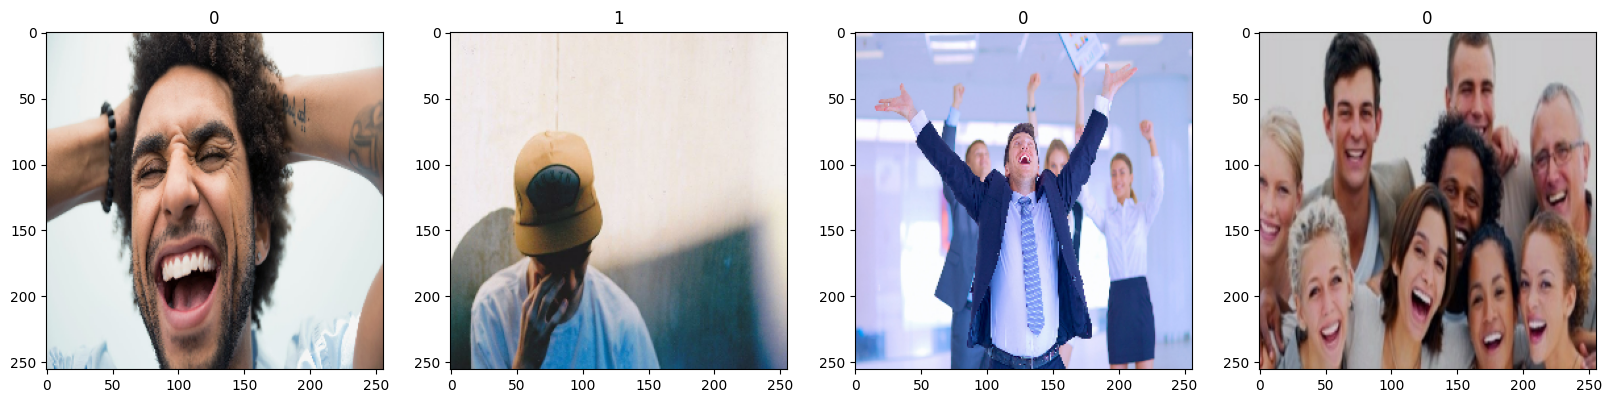

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scaling

In [9]:
data = data.map(lambda x, y : (x/255, y))

In [10]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [35]:
batch[0].max()

np.float32(1.0)

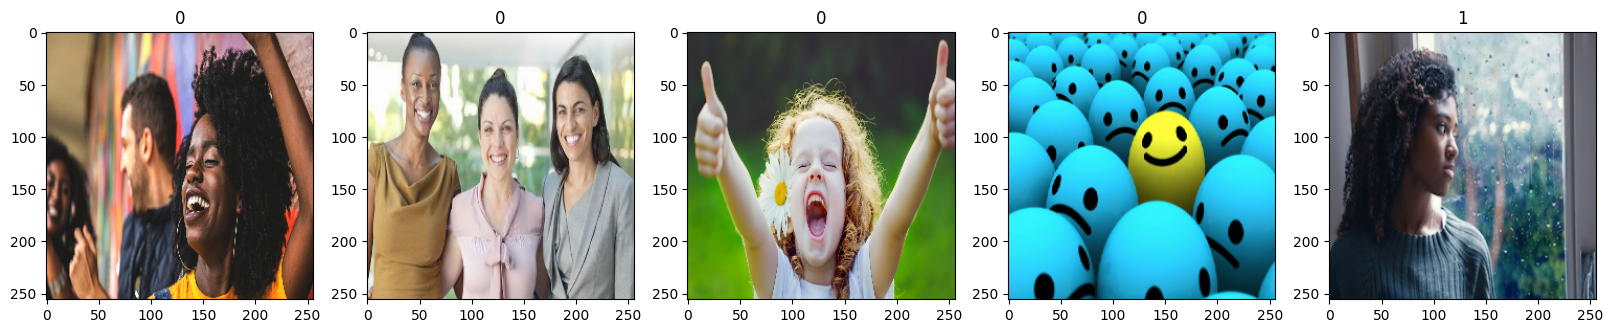

In [12]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [13]:
len(data)

6

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [15]:
test_size+train_size+val_size

6

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
hist = model.fit(train, epochs=20, validation_data = val)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.5547 - loss: 0.9782 - val_accuracy: 0.2500 - val_loss: 0.7450
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.5703 - loss: 0.6160 - val_accuracy: 0.7812 - val_loss: 0.4229
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.6406 - loss: 0.5771 - val_accuracy: 0.6562 - val_loss: 0.5512
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7109 - loss: 0.5196 - val_accuracy: 0.7812 - val_loss: 0.4684
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.8672 - loss: 0.4839 - val_accuracy: 0.9062 - val_loss: 0.4363
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.8594 - loss: 0.3515 - val_accuracy: 0.8438 - val_loss: 0.2674
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.7969 - loss: 0.3700 - val_accuracy: 0.9688 - val_loss: 0.2231
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9141 - loss: 0.2603 - val_accuracy: 0.9062 - val_loss:

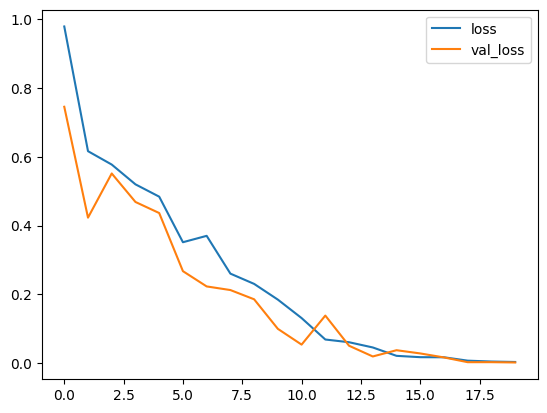

In [23]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

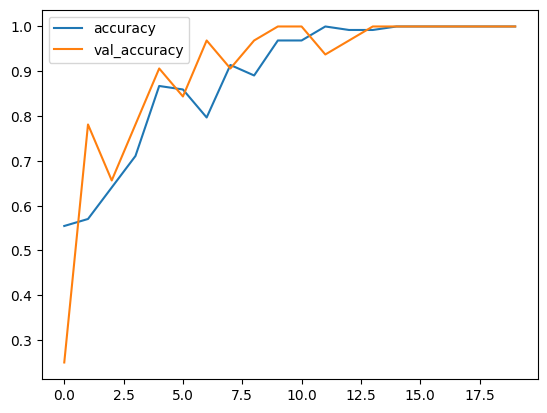

In [24]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [26]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [28]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


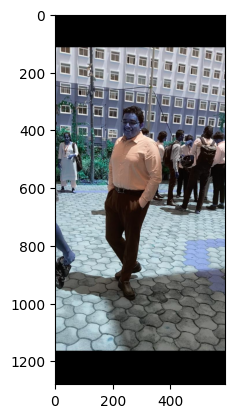

In [29]:
img = cv2.imread('img.png')
plt.imshow(img)
plt.show()

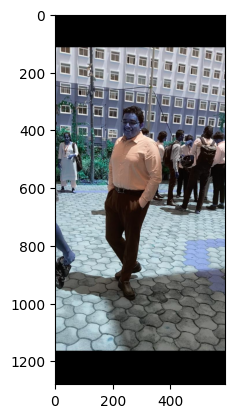

In [30]:
resize = tf.image.resize(img, (256,256))
plt.imshow(img)

In [31]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [33]:
yhat

array([[0.06031149]], dtype=float32)

In [34]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy
